# **Import Libraries**

In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# **Data Load**

In [2]:
data = []
labels = []
class_names = ['10', '20', '50', '100', '200', '500', '1000']
IMG_SIZE = (224, 224)  #Standard Size for CNN

# **Data Preprocessing**

In [3]:
for label in class_names:
    folder = f'D:\Taka_Detection\Taka_Images\Training\{label}'
    for img_file in os.listdir(folder):
        img_path = os.path.join(folder, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, IMG_SIZE)
        img = img / 255.0  #Normalization
        data.append(img)
        labels.append(class_names.index(label))

data = np.array(data)
labels = np.array(labels)

# **Training & Testing Data Split**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# **CNN Model Creation**

In [5]:
model = Sequential([
    Input(shape=(224, 224, 3)),  #New Input Layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

# **Model Compile**

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# **Data Augmentation Technique**

In [7]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# **Training Model**

In [8]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


C:\Users\rony\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 33s 765ms/step - accuracy: 0.1597 - loss: 2.3917 - val_accuracy: 0.2929 - val_loss: 1.7414
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 32s 817ms/step - accuracy: 0.2874 - loss: 1.7226 - val_accuracy: 0.5786 - val_loss: 1.1768
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 30s 774ms/step - accuracy: 0.3944 - loss: 1.3688 - val_accuracy: 0.6464 - val_loss: 0.7623
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 31s 785ms/step - accuracy: 0.5801 - loss: 1.0165 - val_accuracy: 0.9536 - val_loss: 0.2642
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 29s 740ms/step - accuracy: 0.7331 - loss: 0.6518 - val_accuracy: 0.9750 - val_loss: 0.1393
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 29s 749ms/step - accuracy: 0.8493 - loss: 0.3880 - val_accuracy: 0.9786 - val_loss: 0.1101
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 29s 745ms/step - accuracy: 0.8701 - loss: 0.3684 - val_accuracy: 0.9536 - val_loss: 0.1556
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 30s 780ms/step - accuracy: 0.8970 - loss: 0.2981 - val_accuracy: 0.967

# **Save Model**

In [9]:
model.save('taka_detection_cnn_model.h5')

# **Accuracy Check**

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 1.0000 - loss: 0.0281
Test Accuracy: 100.00%


# **Accuracy & Loss Graph**

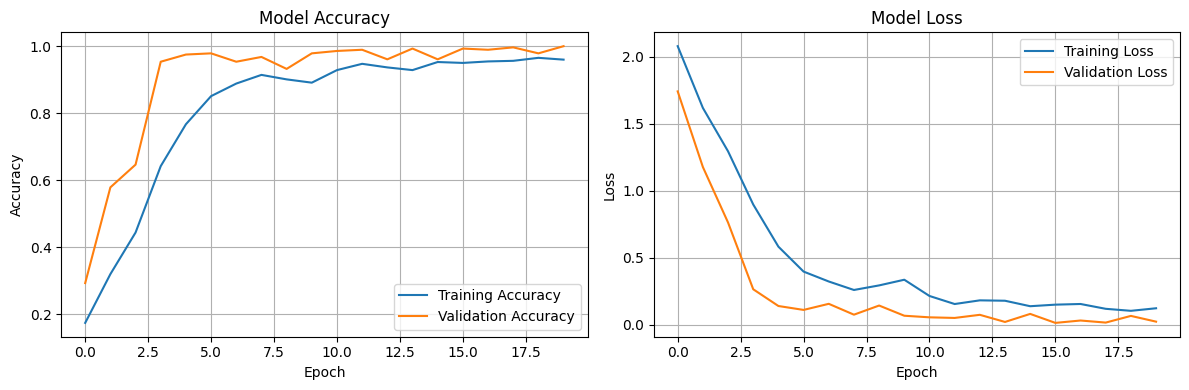

In [11]:
%matplotlib inline
def plot_training_history(history):
    # Accuracy Plot
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()
plot_training_history(history)

# **Confusion Matrix**

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step


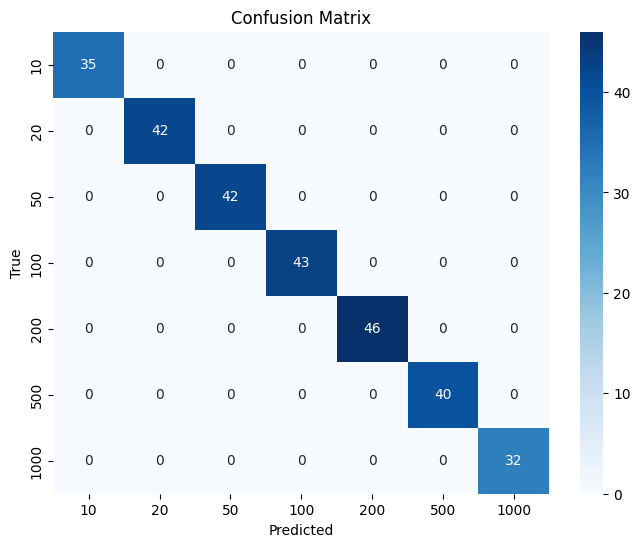

In [12]:
# Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test, class_names):
    #Test Data Prediction
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    
    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
plot_confusion_matrix(model, X_test, y_test, class_names)

# **Classification Report**

In [13]:
    print("\nClassification Report:")
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(classification_report(y_test, y_pred_classes, target_names=class_names))


Classification Report:
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step
              precision    recall  f1-score   support

          10       1.00      1.00      1.00        35
          20       1.00      1.00      1.00        42
          50       1.00      1.00      1.00        42
         100       1.00      1.00      1.00        43
         200       1.00      1.00      1.00        46
         500       1.00      1.00      1.00        40
        1000       1.00      1.00      1.00        32

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280

